In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings                       
warnings.filterwarnings("ignore")

## Loading data

In [40]:

df=pd.read_csv('F:/ict/Wine_clust.csv')


## Analysing and Preprocessing Data

In [41]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
df.shape

(178, 13)

In [43]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [44]:
df.shape

(178, 13)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scalar = StandardScaler()
df=scalar.fit_transform(df)


## KMeans Clustering

In [47]:
from sklearn.cluster import KMeans

In [48]:
wcss = []
for i in range(1,13):
    
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


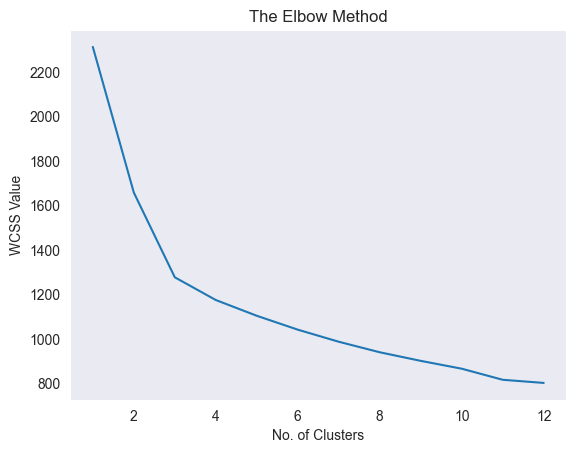

In [49]:

plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Value')
plt.show()
    

In [50]:
##No. of Clusters = 3

In [51]:
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(df)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

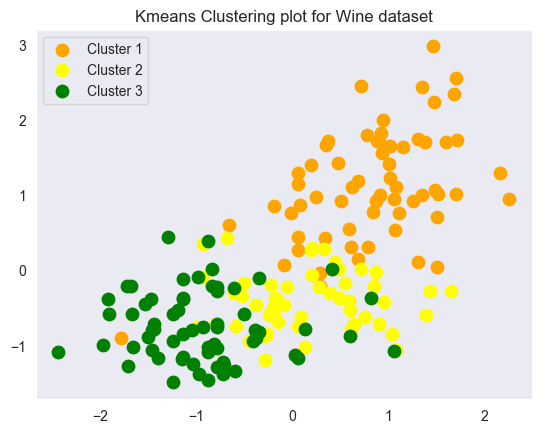

In [52]:
plt.scatter(df[pred_kmeans == 0, 0], df[pred_kmeans == 0, 12], s = 80, c = 'orange', label = 'Cluster 1')
plt.scatter(df[pred_kmeans == 1, 0], df[pred_kmeans == 1, 12], s = 80, c = 'yellow', label = 'Cluster 2')
plt.scatter(df[pred_kmeans == 2, 0],df[pred_kmeans == 2, 12], s = 80, c = 'green', label = 'Cluster 3')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

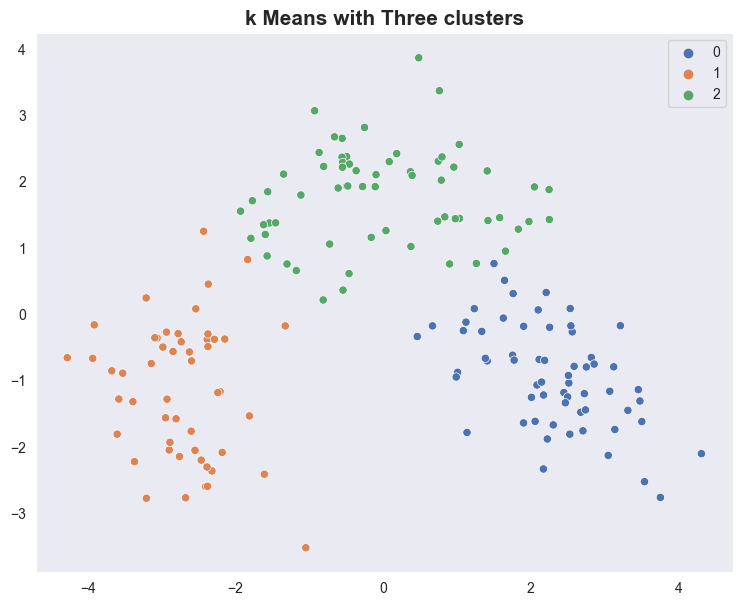

In [53]:


from sklearn import decomposition
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(df)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=pred_kmeans, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("k Means with Three clusters",fontsize=15,fontweight="bold")
plt.show()

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
sil_avg=silhouette_score(df,pred_kmeans)

In [56]:
sil_avg

0.28485891918989864

## DBScan Clustering

In [57]:
## Deciding optimal value for epsilon

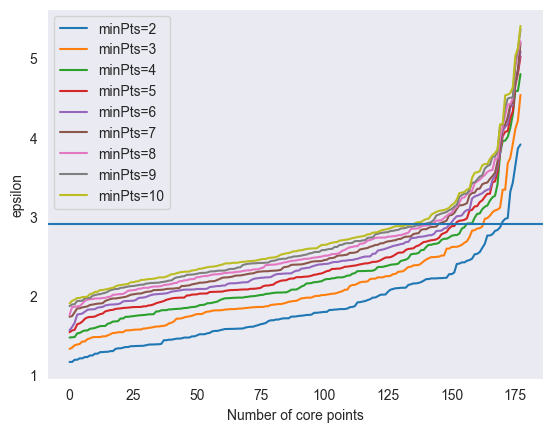

In [58]:
from sklearn.neighbors import NearestNeighbors


neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(2.9)

plt.legend()
plt.show()


In [59]:
## epsilon is 3 ?& min point 2

In [60]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3 ,min_samples=2)
dbscan.fit(df)
clusters = dbscan.labels_
len(set(clusters))

4

In [61]:
 clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [62]:
unique, counts = np.unique(clusters, return_counts=True)
np.asarray((unique, counts)).T

array([[ -1,   5],
       [  0, 168],
       [  1,   3],
       [  2,   2]], dtype=int64)

In [63]:
s = silhouette_score(df,clusters)



In [ ]:
s

In [ ]:


from sklearn import decomposition
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
df_pca = pca.fit_transform(df)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=df_pca[:,0], y=df_pca[:,1],palette="deep")
plt.title("DBSCAN with two clusters",fontsize=15,fontweight="bold")
plt.show()

## Agglomerative Hierarchial Clustering

##Agglomerative Hierarchical Clustering


In [ ]:


import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage



In [ ]:
Z = linkage(df, method = "ward", metric = "euclidean")
plt.figure(figsize=(30, 10))
plt.title("Wine Categories Dendrogram - Hierarchical Clustering",fontsize=20,fontweight="bold")
dend = shc.dendrogram(Z)

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(df)

In [ ]:
cluster.labels_

In [ ]:
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

In [ ]:
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
win_pca = pca.fit_transform(df)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=win_pca[:,0], y=win_pca[:,1],palette="deep")
plt.title("Three clusters ",fontsize=15,fontweight="bold")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(df)

In [ ]:
sil_avg_=silhouette_score(df,y_hc)

In [ ]:
sil_avg_

## Bestt Score is of KMEans